In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from math import *
import numpy as np

## Objetivos: 

- Gerar um gráfico Temp x Posição com resultado numérico
- Gerar um grafico Temp x Posição com resultado analítico

## Solução numérica

In [14]:
def temp_dissipador(
    ro,               # Densidade do material []
    c,                # calor especifico []
    k,                # Condutividade t]ermica []
    h,                # Coeficiente de transf por conveccao
    t_amb,            # Temperatura ambiente
    t_base,           # Temperatura da base
    r,                # Raio da base
    l,                # Comprimento do dissipador [m]
    delta_x,          # Delta x
    tempo_simulacao   # Tempo de simulacao
):

    t_sup = 0
    P = 2 * pi * r    # Perimetro
    A = pi * r**2     # Area
    alpha = k / (c * ro)
    delta_t = delta_x**2 / (alpha * (h*P*delta_x**2/(k*A) + 2))*0.90
    nx = int(l/delta_x)

    matrix = np.zeros(nx)
    matrix[:] = t_sup
    matrix[0] = t_base
    matrix[-1] = 25
    
    matrix_list = [matrix]
    
    # Main loop

    # Tempo
    for t in range(1, int(tempo_simulacao / delta_t)):
        
        matrix = np.zeros(nx)
        matrix[:] = t_sup
        matrix[0] = t_base
        matrix[-1] = 25
        
        # Colunas
        for i in range(1, nx-1):

            temp_atual = matrix_list[t-1][i]
            temp_atual_x_mais_um = matrix_list[t-1][i + 1]
            temp_atual_x_menos_um = matrix_list[t-1][i - 1]
            
            tempo_espaco = (temp_atual_x_mais_um - 2*temp_atual + temp_atual_x_menos_um) / delta_x**2
            conv = h*P*(temp_atual - t_amb)/(k*A)

            conta = temp_atual + alpha*delta_t*(tempo_espaco - conv)
            
            matrix[i] = conta
        
        matrix_list.append(matrix)
        
    return matrix_list


In [15]:
l = 0.3               # Comprimento do dissipador [m]
ro = 2700             # Densidade do material [kg/m^3]
tol = 1e-10           # Tolerância
k = 180               # Condutividade térmica [W/mK]
c = 896               # Calor especifico [J/KgK]
t_amb = 50            # Temperatura amb [C]
t_base = 100          # Temperatura da base [C]
h = 50                # coeficiente de transferência de calor por convecção [W/m^2K]
r = 0.1               # Raio [m]
delta_x = 1e-2        # Delta X
tempo_simulacao = 10000 # [s]

lista = temp_dissipador(
    ro,
    c,
    k,
    h,
    t_amb,
    t_base,
    r,
    l,                
    delta_x,
    tempo_simulacao
)


In [16]:
#lista[-1]

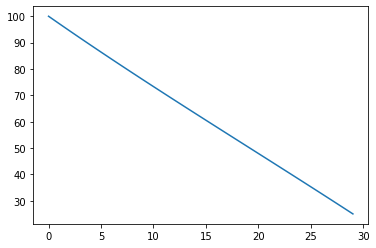

In [17]:
plt.plot(range(len(lista[-1])), lista[-1])
plt.show()

In [ ]:
lista[-1][-2]

## Solucao analítica

In [2]:
# Parâmetros
t_ext = 25    # Temperatura superfície (K)
t_base = 100  # Temp
t_amb = 50    # Temperatura ambiente (K)
r = 0.1             # Raio aleta (m)
L = 0.3             # Comprimento aleta (m)
h = 50              # Coeficiente de transferência de calor (W/m2/K)
k = 180             # Condutividade térmica do Alumínio-2014 (W/mK)

In [9]:
# Support functions

def get_P(R):
    return pi*R*2

def get_A(R):
    return pi*R**2

def get_m(h, P, k, A):
    return sqrt(h*P/k/A)

def get_M(theta_b, h, P, k, A):
    return theta_b*sqrt(h*P*k*A)

def heat_transf_rate_A(m,L,M,h):
    
    numerador = cosh(m*L) - t_ext/t_base
    denominador = sinh(m*L)
    
    return M*numerador/denominador

def get_temp_distrib(m, L, x):
    
    numerador = (t_ext/t_base)*sinh(m*x) + sinh(m*(L-x))
    denominador = sinh(m*L)
    
    return numerador/denominador

def get_T_L(t_amb, t_ext, temp_distrib):
    return temp_distrib*(t_ext - t_amb) + t_amb
    
def get_effectiviness(q_a, h, Ab, theta_b):
    return q_a / (h*Ab*theta_b)

def get_efficience(q_a, h, As, theta_b):
    return q_a / (h*As*theta_b)

In [10]:
P = get_P(r)              # Perímetro
A = get_A(r)              # Área
theta_b = t_ext - t_amb   # Dif temp.

m_q1 = get_m(h, P, k, A)
M_q1 = get_M(theta_b, h, P, k, A)
q_q1 = heat_transf_rate_A(m_q1, L, M_q1, h)

temp_distrib = get_temp_distrib(m_q1, L, L)

T_L = get_T_L(t_amb, t_ext, temp_distrib)

print(f"Temperatura na extremidade da aleta: {round(T_L, 2)} C")

Temperatura na extremidade da aleta: 43.75 C


In [18]:
lista_analitica = [ get_T_L(t_amb, t_ext, get_temp_distrib(m_q1, L, val)) for val in np.arange(0, L, 1e-3) ]
lista_analitica[0] = 100
lista_analitica[-1] = 25

[]

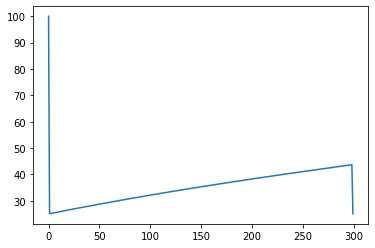

In [19]:
plt.plot(range(len(lista_analitica)), lista_analitica)
plt.plot()